In [36]:
import pandas as pd
from tabulate import tabulate
print("Modules")
def import_excel(file_path, sheet_name=0):
    data_frame = pd.read_excel(file_path, sheet_name=sheet_name)
    return data_frame

if __name__ == '__main__':
    df = import_excel(r"C:\Users\priya\OneDrive\Documents\College Work\ALY6140\Population.xlsx", sheet_name='Population')
print("xlsx imported")

Modules
xlsx imported


In [11]:
# Explore the data
print("Initial Data Exploration:")
print("Dimensions of the dataset:", df.shape)
print("First Few rows of the dataset:\n",df.head())  

Initial Data Exploration:
Dimensions of the dataset: (5000, 13)
First Few rows of the dataset:
                 HEFAMINC   HWHHWGT       HRINTSTA       PREXPLF       PESEX  \
0  (04) 10,000 to 12,499  1836.375  (1) Interview  (1) Employed  (2) Female   
1  (10) 35,000 to 39,999  1542.311  (1) Interview  (1) Employed    (1) Male   
2  (10) 35,000 to 39,999  1542.311  (1) Interview           NaN    (1) Male   
3  (10) 35,000 to 39,999  1542.311  (1) Interview           NaN  (2) Female   
4  (10) 35,000 to 39,999  1542.311  (1) Interview           NaN  (2) Female   

              PENATVTY  PRTAGE  \
0  (057) United States    21.0   
1  (057) United States    49.0   
2  (057) United States     7.0   
3  (057) United States     9.0   
4  (057) United States    14.0   

                                            PRDTOCC1   PWFMWGT   PWLGWGT  \
0  (22) Transportation and material moving occupa...  1836.375  2626.141   
1  (20) Installation, maintenance, and repair occ...  1542.311  2205.888

In [12]:
print("Overview of columns and data types: \n",df.info())  # Overview of columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HEFAMINC  4179 non-null   object 
 1   HWHHWGT   5000 non-null   float64
 2   HRINTSTA  5000 non-null   object 
 3   PREXPLF   1953 non-null   object 
 4   PESEX     4179 non-null   object 
 5   PENATVTY  4179 non-null   object 
 6   PRTAGE    4179 non-null   float64
 7   PRDTOCC1  1977 non-null   object 
 8   PWFMWGT   5000 non-null   float64
 9   PWLGWGT   5000 non-null   float64
 10  PWORWGT   5000 non-null   float64
 11  PWSSWGT   5000 non-null   float64
 12  PWVETWGT  5000 non-null   float64
dtypes: float64(7), object(6)
memory usage: 507.9+ KB
Overview of columns and data types: 
 None


In [13]:
print(df.describe())  # Summary statistics for numerical columns

           HWHHWGT       PRTAGE      PWFMWGT       PWLGWGT       PWORWGT  \
count  5000.000000  4179.000000  5000.000000   5000.000000   5000.000000   
mean   2388.882525    44.086863  2423.032584   2109.146015   2264.149462   
std    1494.271754    23.620775  1537.350366   2391.514162   5023.167621   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%    1004.822000    24.000000   979.526525      0.000000      0.000000   
50%    2904.956500    46.000000  2903.490000    493.154950      0.000000   
75%    3460.504000    63.000000  3520.630500   4508.279500      0.000000   
max    9065.664000    85.000000  9639.847000  12966.150000  35534.110000   

           PWSSWGT     PWVETWGT  
count  5000.000000  5000.000000  
mean   2428.316236  2026.048672  
std    1551.179002  1656.441150  
min       0.000000     0.000000  
25%     956.500625     0.000000  
50%    2903.213000  2438.099000  
75%    3541.087750  3391.083250  
max    9639.847000  8923.480000  


In [14]:
# Example: Convert object columns to categorical types
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')

# Example: Convert numeric columns to appropriate types for reduced memory usage
# Assuming the columns contain integers
numeric_columns = df.select_dtypes(include=['int64']).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, downcast='integer')

# Check memory usage after these changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   HEFAMINC  4179 non-null   category
 1   HWHHWGT   5000 non-null   float64 
 2   HRINTSTA  5000 non-null   category
 3   PREXPLF   1953 non-null   category
 4   PESEX     4179 non-null   category
 5   PENATVTY  4179 non-null   category
 6   PRTAGE    4179 non-null   float64 
 7   PRDTOCC1  1977 non-null   category
 8   PWFMWGT   5000 non-null   float64 
 9   PWLGWGT   5000 non-null   float64 
 10  PWORWGT   5000 non-null   float64 
 11  PWSSWGT   5000 non-null   float64 
 12  PWVETWGT  5000 non-null   float64 
dtypes: category(6), float64(7)
memory usage: 307.5 KB
None


In [15]:
df.to_excel('cleaned_file.xlsx', index=False) 
print("downloaded clean data")
# Keep a reference to the cleaned DataFrame
cleaned_df = df.copy() 
print("copied clean data")

downloaded clean data
copied clean data


In [27]:
num_summary = cleaned_df.describe()
print("Descriptive statistics for numerical columns of cleaned data: \n", num_summary)

Descriptive statistics for numerical columns of cleaned data: 
            HWHHWGT       PRTAGE      PWFMWGT       PWLGWGT       PWORWGT  \
count  1953.000000  1953.000000  1953.000000   1953.000000   1953.000000   
mean   2884.643383    44.428571  2925.417785   3036.478127   3185.208741   
std    1180.538405    14.832436  1204.099014   2414.669989   5749.988658   
min     218.118300    15.000000   218.118300      0.000000      0.000000   
25%    2287.148000    31.000000  2286.821000      0.000000      0.000000   
50%    3180.513000    45.000000  3194.599000   3712.906000      0.000000   
75%    3603.659000    56.000000  3669.188000   4993.365000   3619.404000   
max    9065.664000    85.000000  9065.664000  12966.150000  35534.110000   

           PWSSWGT     PWVETWGT  
count  1953.000000  1953.000000  
mean   2952.988104  2940.535442  
std    1226.654383  1242.717813  
min     179.501200     0.000000  
25%    2311.349000  2288.561000  
50%    3223.578000  3180.591000  
75%    3708.3

In [14]:
cat_summary = cleaned_df.select_dtypes(include='category').apply(lambda x: x.value_counts(normalize=True))
print("Value counts or percentages for categorical columns of cleaned data: \n", cat_summary)

Value counts or percentages for categorical columns of cleaned data: 
                                                     HEFAMINC  HRINTSTA  \
(01) Less than $5,000                               0.020579       NaN   
(01) Management occupations                              NaN       NaN   
(02) 5,000 to 7,499                                 0.011247       NaN   
(02) Business and financial operations occupations       NaN       NaN   
(03) 7,500 to 9,999                                 0.018425       NaN   
...                                                      ...       ...   
(447) Sierra Leone                                       NaN       NaN   
(457) Uganda                                             NaN       NaN   
(461) Zimbabwe                                           NaN       NaN   
(462) Africa, not specified                              NaN       NaN   
(555) Elsewhere                                          NaN       NaN   

                                        

In [28]:
# Cross-tabulation example
cross_tab = pd.crosstab(cleaned_df['PREXPLF'], cleaned_df['PESEX'])
print("Cross-tabulation between 'PREXPLF' and 'PESEX':")
print(cross_tab)

Cross-tabulation between 'PREXPLF' and 'PESEX':
PESEX           (1) Male  (2) Female
PREXPLF                             
(1) Employed         956         930
(2) Unemployed        35          32


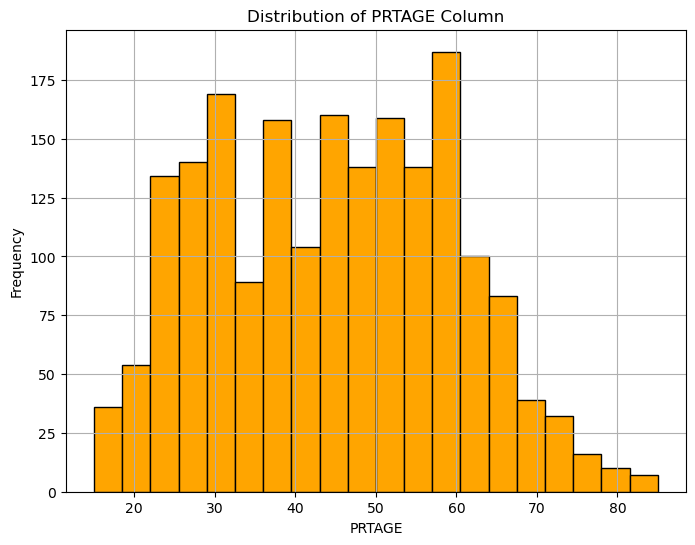

In [29]:
import matplotlib.pyplot as plt

# Histogram for 'PRTAGE' column
plt.figure(figsize=(8, 6))
plt.hist(cleaned_df['PRTAGE'], bins=20, color='orange', edgecolor='black')
plt.xlabel('PRTAGE')
plt.ylabel('Frequency')
plt.title('Distribution of PRTAGE Column')
plt.grid(True)
plt.show()

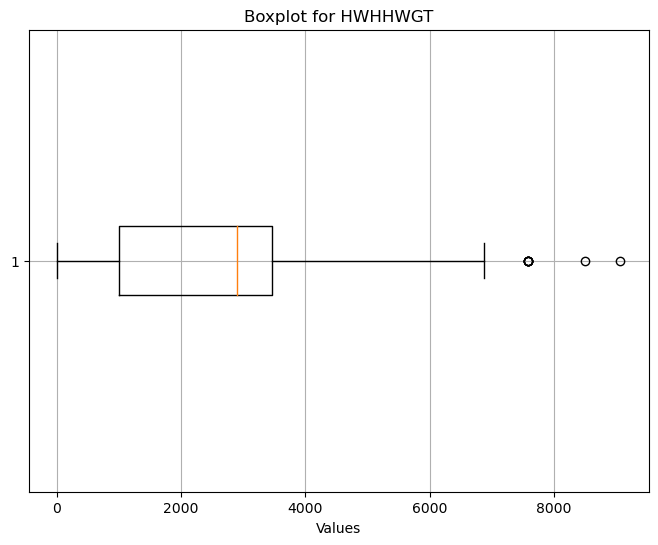

In [21]:
# HWHHWGT column for the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_df['HWHHWGT'].dropna(), vert=False)
plt.title(f'Boxplot for HWHHWGT')
plt.xlabel('Values')
plt.grid(True)
plt.show()

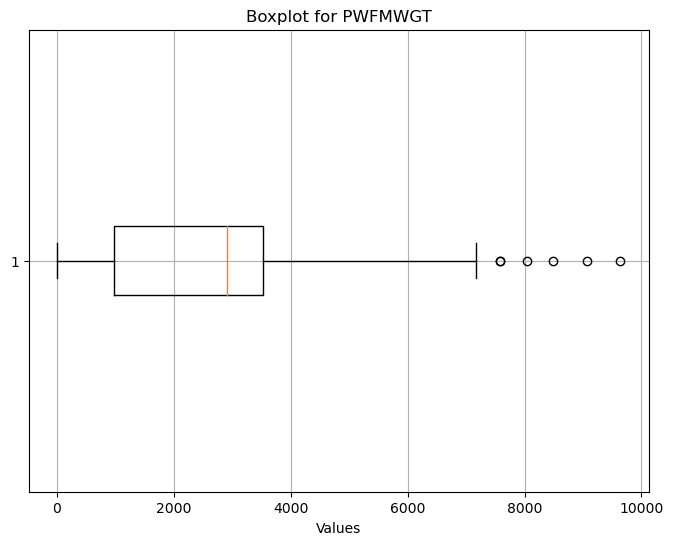

In [24]:
# PWFMWGT column for the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_df['PWFMWGT'].dropna(), vert=False)
plt.title(f'Boxplot for PWFMWGT')
plt.xlabel('Values')
plt.grid(True)
plt.show()

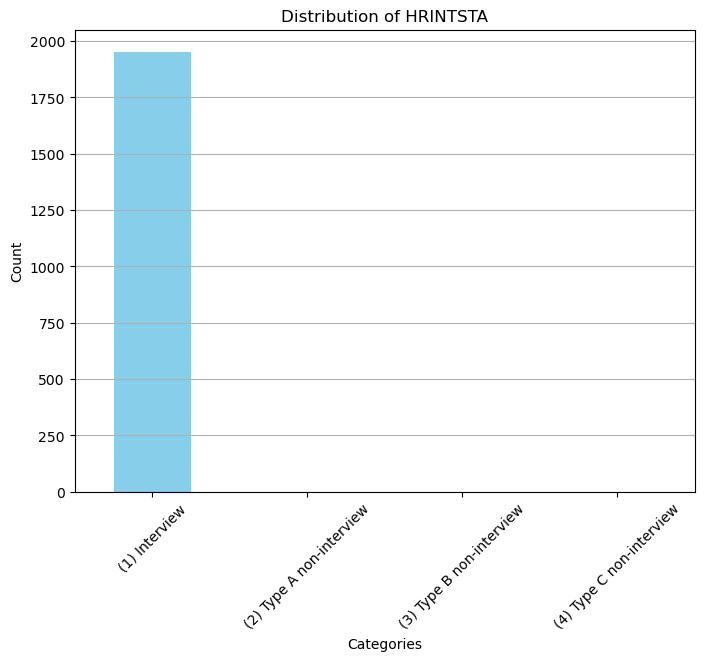

In [30]:
# Bar plot for 'HRINTSTA'
plt.figure(figsize=(8, 6))
cleaned_df['HRINTSTA'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of HRINTSTA')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

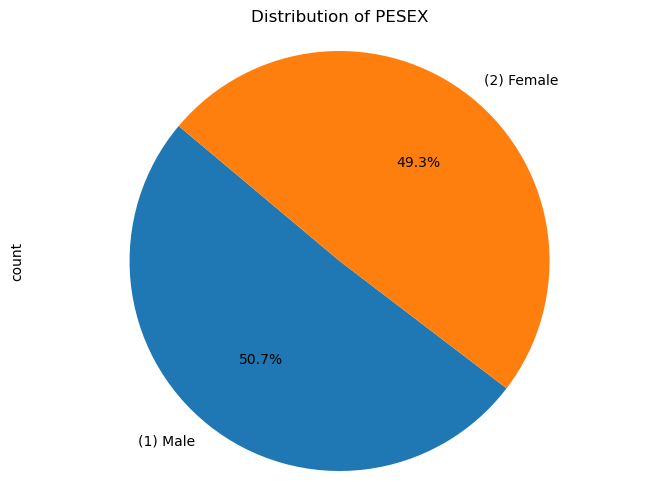

In [32]:
# Pie chart for 'PESEX'
plt.figure(figsize=(8, 6))
cleaned_df['PESEX'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of PESEX')
plt.axis('equal')
plt.show()

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Fill missing values with mean (you can change this strategy if needed)
cleaned_numeric = cleaned_df.select_dtypes(include=['number'])
cleaned_numeric = cleaned_numeric.fillna(cleaned_numeric.mean())
print(cleaned_numeric.info)

<bound method DataFrame.info of         HWHHWGT  PRTAGE    PWFMWGT   PWLGWGT    PWORWGT    PWSSWGT   PWVETWGT
0     1836.3750    21.0  1836.3750  2626.141   7019.797  1836.3750  1750.3630
1     1542.3110    49.0  1542.3110  2205.888   6132.680  1542.3110  1487.8250
8     1545.2180    39.0  1822.2650  2606.291   6991.386  1822.2650  1710.3140
9     1750.6510    63.0  1750.6510  2503.550   7096.749  1750.6510  1685.6740
10    1750.6510    28.0  2692.8380  3851.426  10529.690  2692.8380  2644.2620
...         ...     ...        ...       ...        ...        ...        ...
4986   374.3395    24.0   420.8798     0.000      0.000   420.8798   404.5069
4990   332.1811    61.0   332.1811     0.000      0.000   364.4034   356.6211
4993   327.2454    59.0   327.2454     0.000      0.000   356.4985   352.5192
4994   327.2454    58.0   327.2454     0.000      0.000   327.2454   328.7071
4995   327.2454    28.0   422.4906     0.000      0.000   422.4906   349.7635

[1953 rows x 7 columns]>


In [34]:
import pandas as pd
import statsmodels.api as sm


# Drop rows with missing values
cleaned_df = cleaned_df.dropna(subset=['HWHHWGT', 'PWFMWGT', 'PRTAGE', 'PWSSWGT'])

# Prepare the data for regression
X = cleaned_df[['HWHHWGT', 'PWFMWGT', 'PRTAGE']]
y = cleaned_df['PWSSWGT']
X = sm.add_constant(X)  # Add a constant term for intercept

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())






                            OLS Regression Results                            
Dep. Variable:                PWSSWGT   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.282e+04
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:08:28   Log-Likelihood:                -13700.
No. Observations:                1953   AIC:                         2.741e+04
Df Residuals:                    1949   BIC:                         2.743e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.1314     25.589      4.695      0.0

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Drop rows with missing values
cleaned_df = cleaned_df.dropna(subset=['HWHHWGT', 'PRTAGE', 'PREXPLF'])

# Assuming we want to predict PREXPLF (employment status) using some features
X = cleaned_df[['HWHHWGT', 'PRTAGE']]
y = cleaned_df['PREXPLF']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logreg.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                precision    recall  f1-score   support

  (1) Employed       0.96      1.00      0.98       377
(2) Unemployed       0.00      0.00      0.00        14

      accuracy                           0.96       391
     macro avg       0.48      0.50      0.49       391
  weighted avg       0.93      0.96      0.95       391

[[377   0]
 [ 14   0]]


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.linear_model import Lasso

# Assuming you want to predict HEFAMINC using some features
X = cleaned_df[['HWHHWGT', 'PWFMWGT', 'PRTAGE']]
y = cleaned_df['PWSSWGT']

# Fit Lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)

# Print the coefficients
print("Coefficients:", lasso.coef_)


Coefficients: [ 0.04128686  0.95263669 -1.64040944]


In [25]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Assuming you want to predict PREXPLF using some features
X = cleaned_df[['HWHHWGT', 'PRTAGE']]
y = cleaned_df['PREXPLF']

# Fit Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X, y)

# Display the decision tree
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)


|--- HWHHWGT <= 4604.87
|   |--- PRTAGE <= 25.50
|   |   |--- HWHHWGT <= 3733.76
|   |   |   |--- HWHHWGT <= 3721.72
|   |   |   |   |--- HWHHWGT <= 929.61
|   |   |   |   |   |--- PRTAGE <= 16.50
|   |   |   |   |   |   |--- class: (2) Unemployed
|   |   |   |   |   |--- PRTAGE >  16.50
|   |   |   |   |   |   |--- PRTAGE <= 24.50
|   |   |   |   |   |   |   |--- class: (1) Employed
|   |   |   |   |   |   |--- PRTAGE >  24.50
|   |   |   |   |   |   |   |--- HWHHWGT <= 455.84
|   |   |   |   |   |   |   |   |--- class: (1) Employed
|   |   |   |   |   |   |   |--- HWHHWGT >  455.84
|   |   |   |   |   |   |   |   |--- class: (2) Unemployed
|   |   |   |   |--- HWHHWGT >  929.61
|   |   |   |   |   |--- HWHHWGT <= 2214.90
|   |   |   |   |   |   |--- class: (1) Employed
|   |   |   |   |   |--- HWHHWGT >  2214.90
|   |   |   |   |   |   |--- HWHHWGT <= 2223.81
|   |   |   |   |   |   |   |--- class: (2) Unemployed
|   |   |   |   |   |   |--- HWHHWGT >  2223.81
|   |   |   |   |   |  